# Математика для машинного обучения
## Домашнее задание №6

_Автор задания: Илья Щуров_

Подготовлено для программы «[Практический анализ данных и машинное обучение](https://cs.hse.ru/dpo/bigml)» (ФКН НИУ ВШЭ).

Задание выполнила: *Хужина Вария*

## Многомерный математический анализ и оптимизация

**Определение.** Линией уровня $c$ функции нескольких переменных $y=f(x_1, x_2, \ldots, x_n)$ называется множество точек, в которых функция принимает значение $c$: 

$$\{(x_1, x_2, \ldots, x_n) \in \mathbb R^n\mid f(x_1, x_2, \ldots, x_n)=c\}$$

**Пример.** Для функции $f(x_1, x_2)=x_1^2 + x_2^2$ линиями уровни являются решения уравнения $x_1^2 + x_2^2 = c$, то есть окружности радиуса $\sqrt{c}$.

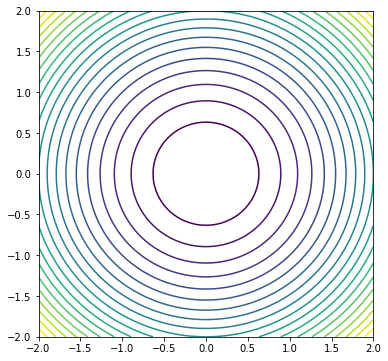

In [55]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(6, 6))
x, y = np.mgrid[-2:2:100j, -2:2:100j] # магия
plt.contour(x, y, x ** 2 + y ** 2, 20) # 20 — количество линий

### Задача 1
Построить несколько линий уровня следующих функций (разница в значениях между соседними линиями уровня должна быть одинаковой). Эту задачу полезно выполнить сначала без компьютера, только с ручкой и бумагой, а затем проверить себя с помощью компьютера.

1. $f(x_1, x_2) = x_1 + x_2$;
3. $f(x_1, x_2) = x_1^2$;
2. $f(x_1, x_2) = x_1 - x_2^2$;
3. $f(x_1, x_2) = x_1 x_2$;
4. $f(x_1, x_2) = |x_1 + x_2|$;
4. $f(x_1, x_2) = \max(x_1, x_2)$.


**Решение**

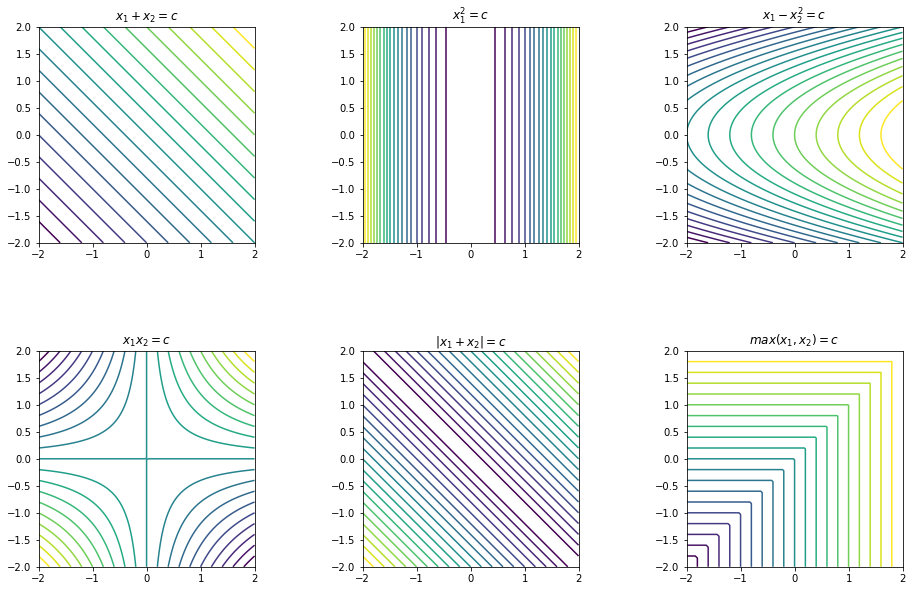

In [77]:
fig = plt.figure(figsize=(12, 12)) 

plt.subplot(331)
plt.title('$x_1 + x_2 = c$')
plt.contour(x, y, x  + y , 20)

plt.subplot(332)
plt.title('$x_1^2 = c$')
plt.contour(x, y, x**2 , 20)

plt.subplot(333)
plt.title('$x_1 - x_2^2 = c$')
plt.contour(x, y, x - y**2 , 20)

plt.subplot(334)
plt.title('$x_1x_2 = c$')
plt.contour(x, y, x*y , 20)

plt.subplot(335)
plt.title('$|x_1 + x_2| = c$')
plt.contour(x, y, abs(x + y) , 20)

plt.subplot(336)
plt.title('$max(x_1, x_2) = c$')
plt.contour(x, y, np.maximum(x,y) , 20)

plt.subplots_adjust(top=1, bottom=0, left=0, right=1, hspace=0.5, wspace=0.5)

**Определение.** *Частной производной* функции нескольких переменных $y=f(x_1, x_2, \ldots, x_n)$ по переменной $x_k$, взятой в точке $(x_1^0, x_2^0, \ldots, x_n^0)$ называется значение производной функции одной переменной $x_k$

$$h(x_k) = f(x_1^0, x_2^0, \ldots, x_{k-1}^0, x_k, x_{k+1}^0, \ldots, x_n^0),$$

взятой в точке $x_k^0$:

$$f'_{x_k}(x_1^0, x_2^0, \ldots, x_n^0) = \frac{\partial f}{\partial x_k}(x_1^0, \ldots, x_n^0) = h'(x_k^0)$$

Иными словами, чтобы вычислить частную производную по некоторой переменной, следует зафиксировать все остальные переменные.

*Вектором градиента* функции $f$ называется вектор, составленный из частных производных:

$$\nabla f (x^0)= (f'_{x_1}(x^0), \ldots, f'_{x_n}(x^0))$$

Вектор градиента показывает направление наискорейшего роста функции $f$ вблизи точки $x^0$.

### Задача 2
Найти вектор градиента от всех функций из предыдущей задачи (в тех точках, в которых они определены).

**Решение**

1. $f(x_1, x_2) = x_1 + x_2$;    
$\nabla f(x_1, x_2) = (1, 1)$    
3. $f(x_1, x_2) = x_1^2$;    
$\nabla f(x_1, x_2) = (2x_1, 0)$    
2. $f(x_1, x_2) = x_1 - x_2^2$;    
$\nabla f(x_1, x_2) = (1, -2x_2)$ 
3. $f(x_1, x_2) = x_1 x_2$;    
$\nabla f(x_1, x_2) = (x_2, x_1)$ 
4. $f(x_1, x_2) = |x_1 + x_2| = 
\begin{cases}
x_1 + x_2, \ \ x_1 + x_2 > 0 \\
-x_1 - x_2, \ \ x_1 + x_2 < 0 \\
\end{cases}$;    
$\nabla f(x_1, x_2) = 
\begin{cases}
(1, 1), \ \ x_1 + x_2 > 0 \\
(-1,-1), \ \ x_1 + x_2 < 0 \\
\end{cases}$   
4. $f(x_1, x_2) = \max(x_1, x_2) = 
\begin{cases}
x_1, \ \  x_1 > x_2 \\
x_2, \ \ x_2 > x_1 \\
\end{cases}$.    
$\nabla f(x_1, x_2) = 
\begin{cases}
(1, 0), \ \  x_1 > x_2 \\
(0, 1), \ \ x_2 > x_1 \\
\end{cases}$.


### Задача 3
Проверить указанное утверждение, построив векторы градиента для функций из пунктов 1 — 4 задачи 6 на тех же картинках, на которых построены линии уровня. Можно использовать `plt.quiver` как в примере выше.

**Решение**

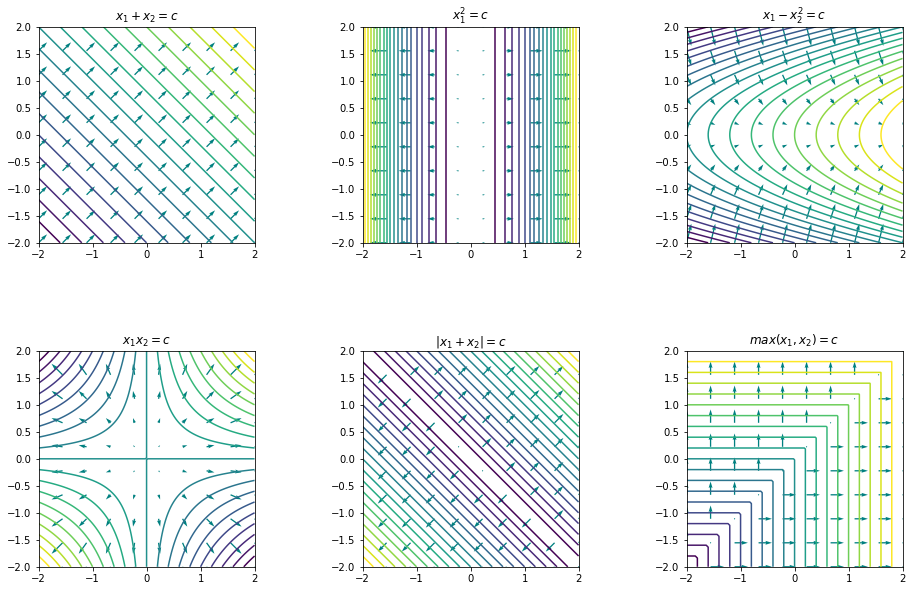

In [72]:
fig = plt.figure(figsize=(12, 12)) 
x_1, x_2 = np.mgrid[-2:2:10j, -2:2:10j]
plt.subplot(331)
plt.title('$x_1 + x_2 = c$')
plt.contour(x, y, x  + y , 20)
plt.quiver(x_1, x_2, 1, 1, color='Teal')

plt.subplot(332)
plt.title('$x_1^2 = c$')
plt.contour(x, y, x**2 , 20)
plt.quiver(x_1, x_2, 2*x_1, 0, color='Teal')

plt.subplot(333)
plt.title('$x_1 - x_2^2 = c$')
plt.contour(x, y, x - y**2 , 20)
plt.quiver(x_1, x_2, 1, -2*x_2, color='Teal')

plt.subplot(334)
plt.title('$x_1x_2 = c$')
plt.contour(x, y, x*y , 20)
plt.quiver(x_1, x_2, x_1, x_2, color='Teal')

plt.subplot(335)
plt.title('$|x_1 + x_2| = c$')
plt.contour(x, y, abs(x + y) , 20)
plt.quiver(x_1, x_2, 1*(x_1 + x_2 > 0) - 1*(x_1 + x_2 < 0), 1*(x_1 + x_2 > 0) - 1*(x_1 + x_2 < 0), color='Teal')

plt.subplot(336)
plt.title('$max(x_1, x_2) = c$')
plt.contour(x, y, np.maximum(x,y) , 20)
plt.quiver(x_1, x_2, 1*(x_1 > x_2), 1*(x_2 > x_1), color='Teal')

plt.subplots_adjust(top=1, bottom=0, left=0, right=1, hspace=0.5, wspace=0.5)

### Задача 4
Реализовать метод градиентного спуска.

In [79]:
def f(u):
    x, y = u
    return x**2 + 5 * y**2

def Df(u):
    x, y = u
    return np.array([2* x, 10 * y])

x0 = np.array([2, 3])

# впишите сюда код для метода градиентного спуска

In [99]:
def gradient_descent(dfunc, x0, eps=0.0001, step=0.01):
    x_old = x0
    x_curr = x0 - step*dfunc(x0)
    while np.linalg.norm(x_curr - x_old) >= eps:
        x_old = x_curr
        x_curr = x_old - step*dfunc(x_old)
    return x_curr

In [100]:
x_min = gradient_descent(Df, x0)
x_min

array([  4.85736291e-03,   6.94047298e-14])

In [101]:
round(f(x_min), 3)

0.0

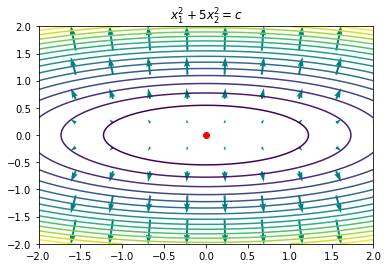

In [102]:
plt.title('$x_1^2 + 5x_2^2 = c$')
plt.contour(x, y, x**2 + 5*y**2 , 20)
plt.quiver(x_1, x_2, 2*x_1, 10*x_2, color='Teal')
plt.plot(x_min[0], x_min[1], 'o', color='red')

In [96]:
from scipy.optimize import minimize
opt_res_obj = minimize(f, x0=x0)

In [98]:
opt_res_obj.x

array([ -6.22189397e-08,   1.36168932e-08])